### Preprocesamiento de Datos
Revisión de datos para preparlos previos al modelo

In [1]:
import pandas as pd

df = pd.read_csv("../Dataset/df.csv")


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    float64
 1   sex       920 non-null    float64
 2   cp        920 non-null    float64
 3   trestbps  861 non-null    float64
 4   chol      890 non-null    float64
 5   fbs       830 non-null    float64
 6   restecg   918 non-null    float64
 7   thalach   865 non-null    float64
 8   exang     865 non-null    float64
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    float64
 11  ca        309 non-null    float64
 12  thal      434 non-null    float64
 13  target    920 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 100.8 KB


In [6]:
df.isnull().sum()

age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalach      55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
target        0
dtype: int64

### Codificación de Variables Categóricas

Las siguientes variables categóricas necesitan de codificación ya que los resultados no son binarios. Se generan columnas en base a la cantidad necesaria para tener codificada la variable (One-hot Encoding).

In [23]:
from sklearn.preprocessing import LabelEncoder

# Copiamos el dataset
df_encoded = df.copy()

# Columnas categóricas múltiples
multi_cat_cols = ['cp', 'restecg', 'slope', 'ca', 'thal']

# Label encoding
df_encoded = pd.get_dummies(df, columns=multi_cat_cols, drop_first=True, dtype=int)


In [ ]:
#Reemplazamos los valores NaN por ceros.
df_encoded.fillna(0, inplace=True)
#PROBAR CON LA MEDIA O LA MEDIANA


In [ ]:
# Es necesario escalar las variables numéricas para que todas tengan la misma importancia en el modelo.
from sklearn.preprocessing import StandardScaler

num_cols = ["age", "trestbps", "chol", "thalach", "oldpeak"]

scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])


In [34]:
df_encoded.to_csv("../Dataset/df_encoded.csv", index=False)

### Detección de Outliers
# REVISAR

age: 0 outliers


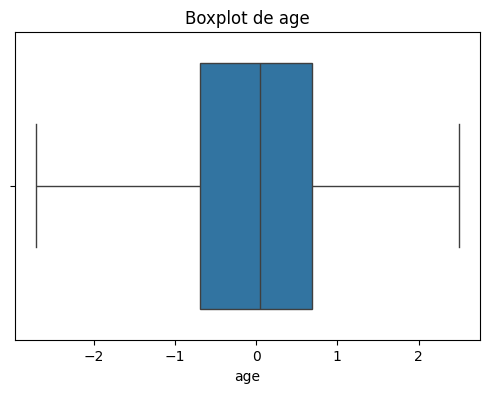

trestbps: 40 outliers


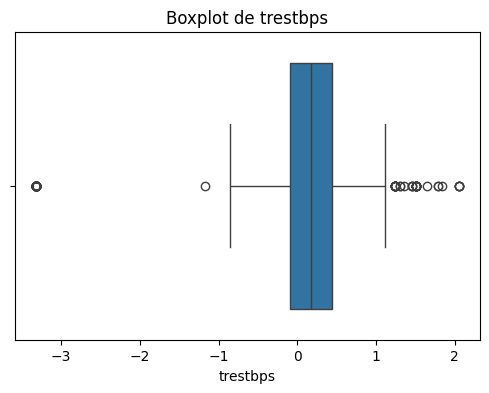

chol: 8 outliers


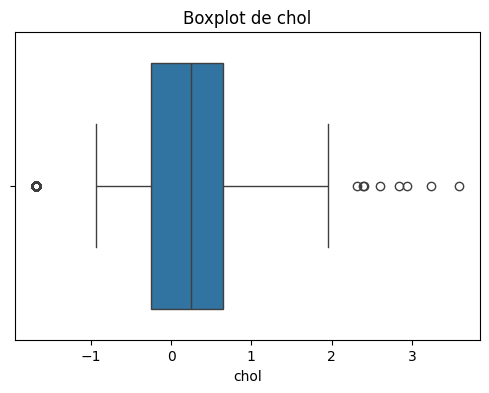

thalach: 0 outliers


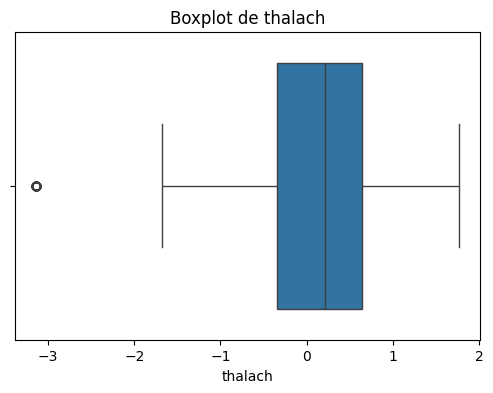

oldpeak: 15 outliers


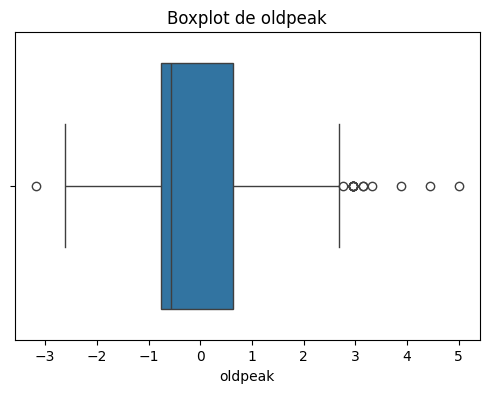

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ["age", "trestbps", "chol", "thalach", "oldpeak"]

for col in numeric_cols:
    Q1 = df_encoded[col].quantile(0.25)
    Q3 = df_encoded[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df_encoded[(df[col] < Q1 - 1.5*IQR) | (df_encoded[col] > Q3 + 1.5*IQR)]
    print(f"{col}: {len(outliers)} outliers")
    
    # Boxplot para visualización
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df_encoded[col])
    plt.title(f"Boxplot de {col}")
    plt.show()
